In [790]:
from __future__ import print_function
import math
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import seaborn as sns
sns.set()
import sklearn
from IPython.display import Image
from IPython.display import display
from IPython.display import HTML
from sklearn import metrics
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn import preprocessing
import tabletext


In [791]:
dt1 = pd.read_csv("C:\\Users\\boubou\\Desktop\\crimes.csv")
dt1.head(5)

,TYPE,YEAR,MONTH,DAY,HOUR,MINUTE,HUNDRED_BLOCK,NEIGHBOURHOOD,X,Y,Latitude,Longitude
0,Other Theft,2003,5,12,16,15,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763
1,Other Theft,2003,5,7,15,20,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763
2,Other Theft,2003,4,23,16,40,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763
3,Other Theft,2003,4,20,11,15,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763
4,Other Theft,2003,4,12,17,45,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763


In [792]:
dt1 = dt1[(dt1.YEAR).astype(int)==2017]
dt2 = dt1.drop(["HUNDRED_BLOCK","X","Y","MINUTE"],axis=1)
dt2.head(3)


,TYPE,YEAR,MONTH,DAY,HOUR,NEIGHBOURHOOD,Latitude,Longitude
457810,Theft from Vehicle,2017,5,3,9,West End,49.287725,-123.127554
457811,Theft from Vehicle,2017,3,26,4,Hastings-Sunrise,49.287677,-123.027623
457812,Theft of Bicycle,2017,6,3,12,Central Business District,49.278544,-123.126168


In [793]:
print ("lat empty count :", dt2['Latitude'].isnull().sum())
print ("lng empty count :", dt2['Longitude'].isnull().sum())
print ("twp empty count :", dt2['NEIGHBOURHOOD'].isnull().sum())

lat empty count : 0
lng empty count : 0
twp empty count : 0


In [794]:
dt2.describe()

,YEAR,MONTH,DAY,HOUR,Latitude,Longitude
count,16205.0,16205.000000,16205.000000,16205.000000,16205.000000,16205.000000
mean,2017.0,3.866646,14.755878,13.713977,49.265301,-123.107118
std,0.0,1.832852,8.596420,6.545387,0.021607,0.035836
min,2017.0,1.000000,1.000000,0.000000,49.201275,-123.221516
25%,2017.0,2.000000,8.000000,9.000000,49.255378,-123.126710
50%,2017.0,4.000000,14.000000,15.000000,49.272382,-123.112808
75%,2017.0,5.000000,22.000000,19.000000,49.282155,-123.089250
max,2017.0,7.000000,31.000000,23.000000,49.313349,-123.023525


In [795]:
dt3 = dt2.copy()
dt3.head(5)


,TYPE,YEAR,MONTH,DAY,HOUR,NEIGHBOURHOOD,Latitude,Longitude
457810,Theft from Vehicle,2017,5,3,9,West End,49.287725,-123.127554
457811,Theft from Vehicle,2017,3,26,4,Hastings-Sunrise,49.287677,-123.027623
457812,Theft of Bicycle,2017,6,3,12,Central Business District,49.278544,-123.126168
457813,Theft from Vehicle,2017,3,25,19,Central Business District,49.278168,-123.117031
457814,Vehicle Collision or Pedestrian Struck (with I...,2017,3,23,8,Mount Pleasant,49.259629,-123.077582


In [796]:
dt3 = dt2.copy()
dt3 = dt3.drop([],axis = 1)
type_unique = pd.DataFrame(dt3.TYPE.unique())
type_unique = type_unique.sort_values([0],ascending =  True)
type_unique.head(10)

,0
7,Break and Enter Commercial
3,Break and Enter Residential/Other
5,Mischief
4,Other Theft
0,Theft from Vehicle
1,Theft of Bicycle
6,Theft of Vehicle
8,Vehicle Collision or Pedestrian Struck (with F...
2,Vehicle Collision or Pedestrian Struck (with I...


In [797]:
CATEGORIES = {'Theft from Vehicle':0,'Theft of Bicycle':1,'Vehicle Collision or Pedestrian Struck (with Injury)':2,'Break and Enter Residential/Other':3,'Other Theft':4,'Mischief':5,'Theft of Vehicle':6,'Break and Enter Commercial':7,'Vehicle Collision or Pedestrian Struck (with Fatality)':8}
dt3['TYPE'].replace(CATEGORIES,inplace=True)
dt3.head(3)



,TYPE,YEAR,MONTH,DAY,HOUR,NEIGHBOURHOOD,Latitude,Longitude
457810,0,2017,5,3,9,West End,49.287725,-123.127554
457811,0,2017,3,26,4,Hastings-Sunrise,49.287677,-123.027623
457812,1,2017,6,3,12,Central Business District,49.278544,-123.126168


In [798]:
dt3['timeStamp'] = pd.to_datetime(dt3[['YEAR', 'MONTH', 'DAY']], errors = 'coerce')
dt6 = dt3
hours_range = 8
dt6['datetime'] = pd.to_datetime(dt3['timeStamp'])
dt6['year'] = dt3['datetime'].dt.year
dt6['month'] = dt3['datetime'].dt.month
dt6['day'] = dt3['datetime'].dt.day
dt6['day_part'] = np.floor(dt6['HOUR'].astype(int)/hours_range)
dt6['day_part'] = dt6.day_part.astype(int)
dt6['dayofweek'] = dt3['datetime'].dt.dayofweek
dt6['week'] = dt3['datetime'].dt.week
dt6.head()
dte=dt6[(dt6["DAY"].astype(str).str.contains("12")) & (dt6["MONTH"].astype(str).str.contains("7")) & (dt6["dayofweek"].astype(str).str.contains("2")) & (dt6["week"].astype(str).str.contains("28"))]
dte.head()

,TYPE,YEAR,MONTH,DAY,HOUR,NEIGHBOURHOOD,Latitude,Longitude,timeStamp,datetime,year,month,day,day_part,dayofweek,week
457841,0,2017,7,12,23,Riley Park,49.256473,-123.096398,2017-07-12,2017-07-12,2017,7,12,2,2,28
457846,1,2017,7,12,8,Central Business District,49.288067,-123.115461,2017-07-12,2017-07-12,2017,7,12,1,2,28
458091,0,2017,7,12,23,Central Business District,49.283964,-123.107074,2017-07-12,2017-07-12,2017,7,12,2,2,28
458128,5,2017,7,12,19,West End,49.292623,-123.133719,2017-07-12,2017-07-12,2017,7,12,2,2,28
458366,3,2017,7,12,3,Renfrew-Collingwood,49.252927,-123.033926,2017-07-12,2017-07-12,2017,7,12,0,2,28


In [799]:
dt6 = dt6.drop(["HOUR","YEAR","DAY","MONTH"],axis=1)

In [800]:
epsilon = 0.0001
lat_max = dt6['Latitude'].max() + epsilon
lat_min = dt6['Latitude'].min()
lat_range = lat_max - lat_min
print ("Latitude min-max: <",lat_min,lat_max,"> | range :",lat_range)
lng_max = dt6['Longitude'].max() + epsilon
lng_min = dt6['Longitude'].min()
lng_range = lng_max - lng_min
print ("Longitude min-max: <",lng_min,lng_max,"> | range :",lng_range)

Latitude min-max: < 49.20127518 49.313448720000004 > | range : 0.11217354000000057
Longitude min-max: < -123.2215158 -123.023425 > | range : 0.1980908000000028


In [801]:
lat_split = 1 
lng_split = 1
lat_hop = lat_range/lat_split 
print ("Lat hop : ",lat_hop)
lng_hop = lng_range/lng_split
print ("Lng hop : ",lng_hop)

dt6['lat_grid'] = (np.floor(((dt6['Latitude']-lat_min)/lat_hop)))
dt6['lng_grid'] = (np.floor(((dt6['Longitude']-lng_min)/lng_hop)))
dt6.lat_grid = dt6.lat_grid.astype(int)
dt6.lng_grid = dt6.lng_grid.astype(int)
dt6 = dt6.drop(['Latitude','Longitude'],axis = 1)

dt6.head(10)



Lat hop :  0.11217354000000057
Lng hop :  0.1980908000000028


,TYPE,NEIGHBOURHOOD,timeStamp,datetime,year,month,day,day_part,dayofweek,week,lat_grid,lng_grid
457810,0,West End,2017-05-03,2017-05-03,2017,5,3,1,2,18,0,0
457811,0,Hastings-Sunrise,2017-03-26,2017-03-26,2017,3,26,0,6,12,0,0
457812,1,Central Business District,2017-06-03,2017-06-03,2017,6,3,1,5,22,0,0
457813,0,Central Business District,2017-03-25,2017-03-25,2017,3,25,2,5,12,0,0
457814,2,Mount Pleasant,2017-03-23,2017-03-23,2017,3,23,1,3,12,0,0
457815,2,Mount Pleasant,2017-04-17,2017-04-17,2017,4,17,1,0,16,0,0
457816,0,Kensington-Cedar Cottage,2017-06-21,2017-06-21,2017,6,21,0,2,25,0,0
457817,1,Mount Pleasant,2017-06-30,2017-06-30,2017,6,30,1,4,26,0,0
457818,0,Hastings-Sunrise,2017-03-25,2017-03-25,2017,3,25,2,5,12,0,0
457819,0,Fairview,2017-04-19,2017-04-19,2017,4,19,2,2,16,0,0


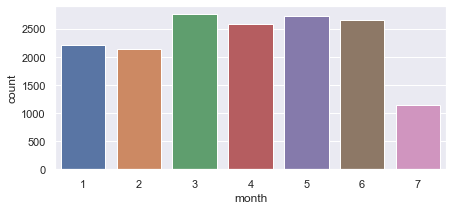

In [802]:
fig, ax = plt.subplots(figsize=(7,3))  
ax = sns.countplot(x="month", data=dt6,ax=ax)

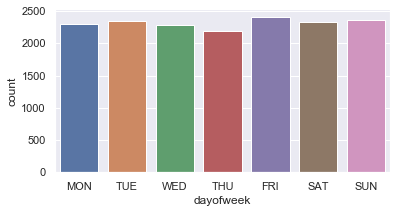

In [803]:
fig1, ax1 = plt.subplots(figsize=(6,3))
ax1 = sns.countplot(x="dayofweek", data=dt6)
ax1.axes.set_xticklabels(["MON", "TUE","WED","THU","FRI","SAT","SUN"])
pass

In [804]:
dt6[(dt6.TYPE).astype(int)==8].count()

TYPE             5
NEIGHBOURHOOD    5
timeStamp        5
datetime         5
year             5
month            5
day              5
day_part         5
dayofweek        5
week             5
lat_grid         5
lng_grid         5
dtype: int64

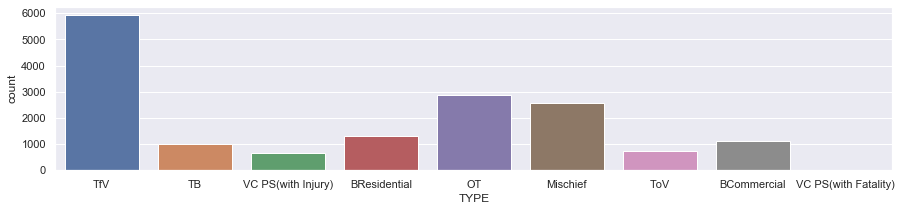

In [805]:
fig, ax = plt.subplots(figsize=(15,3))
ax = sns.countplot(x="TYPE",data=dt6)
ax.axes.set_xticklabels(['TfV','TB','VC PS(with Injury)','BResidential','OT','Mischief','ToV','BCommercial','VC PS(with Fatality)'])
pass

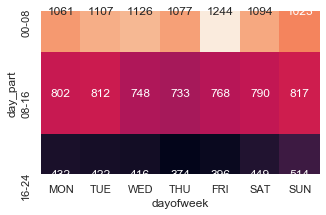

In [806]:
# lets check the time impact on the events
dt_timegrid = dt6.groupby(['dayofweek','day_part']).size().reset_index(name='count')
dt_timeheatmap = dt_timegrid.pivot(index='day_part', columns='dayofweek', values='count')
# generate heatmap
fig, ax = plt.subplots(figsize=(5,3))
ax = sns.heatmap(dt_timeheatmap,annot=True, fmt="d",cbar=False)
ax.invert_yaxis()
ax.axes.set_yticklabels(["16-24","08-16","00-08"])
ax.axes.set_xticklabels(["MON", "TUE","WED","THU","FRI","SAT","SUN"])
pass

In [807]:
dt6.describe()

,TYPE,year,month,day,day_part,dayofweek,week,lat_grid,lng_grid
count,16205.000000,16205.0,16205.000000,16205.000000,16205.000000,16205.000000,16205.000000,16205.0,16205.0
mean,2.647084,2017.0,3.866646,14.755878,1.291824,3.017217,14.903795,0.0,0.0
std,2.406928,0.0,1.832852,8.596420,0.759819,2.006380,8.113826,0.0,0.0
min,0.000000,2017.0,1.000000,1.000000,0.000000,0.000000,1.000000,0.0,0.0
25%,0.000000,2017.0,2.000000,8.000000,1.000000,1.000000,8.000000,0.0,0.0
50%,3.000000,2017.0,4.000000,14.000000,1.000000,3.000000,15.000000,0.0,0.0
75%,5.000000,2017.0,5.000000,22.000000,2.000000,5.000000,22.000000,0.0,0.0
max,8.000000,2017.0,7.000000,31.000000,2.000000,6.000000,52.000000,0.0,0.0


In [808]:
final_columns = ["month","week","dayofweek","day","lat_grid","lng_grid","TYPE"]
dt7 = dt6[final_columns]
dt7.head(3)


,month,week,dayofweek,day,lat_grid,lng_grid,TYPE
457810,5,18,2,3,0,0,0
457811,3,12,6,26,0,0,0
457812,6,22,5,3,0,0,1


In [809]:
dt7.describe()

,month,week,dayofweek,day,lat_grid,lng_grid,TYPE
count,16205.000000,16205.000000,16205.000000,16205.000000,16205.0,16205.0,16205.000000
mean,3.866646,14.903795,3.017217,14.755878,0.0,0.0,2.647084
std,1.832852,8.113826,2.006380,8.596420,0.0,0.0,2.406928
min,1.000000,1.000000,0.000000,1.000000,0.0,0.0,0.000000
25%,2.000000,8.000000,1.000000,8.000000,0.0,0.0,0.000000
50%,4.000000,15.000000,3.000000,14.000000,0.0,0.0,3.000000
75%,5.000000,22.000000,5.000000,22.000000,0.0,0.0,5.000000
max,7.000000,52.000000,6.000000,31.000000,0.0,0.0,8.000000


In [810]:
groupby_list = ['month','week','dayofweek','day','lat_grid','lng_grid']
dt_cat = dict()  
for item in CATEGORIES:
    dt_temp = dt7.loc[(dt7['TYPE'] == CATEGORIES[item])]
    dt_cat[item] =  dt_temp.groupby(groupby_list).size().reset_index(name='count')
dt_cat['ALL'] = dt7.groupby(groupby_list).size().reset_index(name='count') # All data, without category grouping
dt_cat['ALL'].head(3)

,month,week,dayofweek,day,lat_grid,lng_grid,count
0,1,1,0,2,0,0,55
1,1,1,1,3,0,0,69
2,1,1,2,4,0,0,58


In [811]:
dt_cat['ALL'].describe()

,month,week,dayofweek,day,lat_grid,lng_grid,count
count,194.000000,194.000000,194.000000,194.000000,194.0,194.0,194.000000
mean,3.742268,14.484536,2.984536,15.025773,0.0,0.0,83.530928
std,1.873062,8.409362,2.008987,8.783779,0.0,0.0,15.516048
min,1.000000,1.000000,0.000000,1.000000,0.0,0.0,38.000000
25%,2.000000,7.250000,1.000000,7.250000,0.0,0.0,72.250000
50%,4.000000,14.000000,3.000000,14.500000,0.0,0.0,84.500000
75%,5.000000,21.000000,5.000000,22.750000,0.0,0.0,94.000000
max,7.000000,52.000000,6.000000,31.000000,0.0,0.0,116.000000


In [812]:
dt_geogrid = dt7.groupby(['lat_grid','lng_grid']).size().reset_index(name='count')
dt_geoheatmap = dt_geogrid.pivot(index='lat_grid',columns='lng_grid', values='count')


In [813]:
from sklearn.metrics import r2_score
import sklearn.ensemble as ek

In [814]:
def run_regression(name,input_dt):
    X = input_dt.iloc[:,[0,1,2,3,4,5,6]]
    Y = input_dt.iloc[:,[6]]
    Y = Y.values.reshape(len(X))
    validation_size = 0.20
    seed = 7
    X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = validation_size,random_state = seed)
    model =ek.RandomForestClassifier(n_estimators=50)
    model.fit(X_train,Y_train)
    return name,model,r2_score(Y_test, model.predict(X_test))

# run model for all categories and put results into the table.
# also save trained models for later use
results_table = [["TYPE","r2_score"]]
trained_models = dict() # holder for trained models
for item in dt_cat:
    results = run_regression(item,dt_cat[item])
    results_table.append([item,results[2]])
    trained_models[item] =  results[1]

print (results_table)
pd.DataFrame(results_table)

[['TYPE', 'r2_score'], ['Theft from Vehicle', 0.8550109529025192], ['Theft of Bicycle', 0.7736261335081394], ['Vehicle Collision or Pedestrian Struck (with Injury)', 0.9222689075630252], ['Break and Enter Residential/Other', 0.6536096561147802], ['Other Theft', 0.8379304046031602], ['Mischief', 0.7908802333562114], ['Theft of Vehicle', 0.7958132766147991], ['Break and Enter Commercial', 0.87374749498998], ['Vehicle Collision or Pedestrian Struck (with Fatality)', nan], ['ALL', 0.8899866310160428]]


C:\Users\boubou\Anaconda3\lib\site-packages\sklearn\metrics\regression.py:543: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


,0,1
0,TYPE,r2_score
1,Theft from Vehicle,0.855011
2,Theft of Bicycle,0.773626
3,Vehicle Collision or Pedestrian Struck (with I...,0.922269
4,Break and Enter Residential/Other,0.65361
5,Other Theft,0.83793
6,Mischief,0.79088
7,Theft of Vehicle,0.795813
8,Break and Enter Commercial,0.873747
9,Vehicle Collision or Pedestrian Struck (with F...,NaN


In [815]:
singleday_dt = []

row_base = [8,28,2,8]
for day_idx in range(3):
    for idx,row in dt_geogrid.iterrows():
        singleday_dt.append(row_base+[day_idx,row['lat_grid'],row['lng_grid']]) 
singleday_dt = pd.DataFrame(singleday_dt,columns=final_columns[:7])
singleday_dt.head(5)

,month,week,dayofweek,day,lat_grid,lng_grid,TYPE
0,8,28,2,8,0,0,0
1,8,28,2,8,1,0,0
2,8,28,2,8,2,0,0


In [816]:
predictions_all = trained_models['ALL'].predict(singleday_dt)
singleday_dt_full = singleday_dt
singleday_dt_full['events'] = predictions_all
print ("Total number of crime events in selected day is : ", round(singleday_dt_full['events'].sum()))

Total number of crime events in selected day is :  141


# 